In [112]:
import pandas as pd
import statistics as st
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:

# Carregando o arquivo de dados e verificando a existência do arquivo
df = pd.read_excel('Movie companies.xlsx')
df

,Brand,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Comics,15806336901,69,Avengers: Endgame,858373000
1,Legendary Pictures,7018798067,56,Jurassic World,652270625
2,Lucasfilm,6325022918,39,Star Wars: Episode VII - The Force Awakens,936662225
3,Pixar,6078217662,28,Incredibles 2,608581744
4,DC Comics,5815645953,46,The Dark Knight,533345358
5,DreamWorks Animation,5792217737,41,Shrek 2,441226247
6,Vertigo Entertainment,3154664176,41,It,327481748
7,Bad Robot,3077078931,15,Star Wars: Episode VII - The Force Awakens,936662225
8,Walt Disney Animation Studios,2774912904,15,Frozen II,477373578
9,Illumination Entertainment,2759505881,13,The Secret Life of Pets,368384330


In [114]:
# Exibindo o cabeçalho dos dados para entender a estrutura
df.head()


,Brand,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Comics,15806336901,69,Avengers: Endgame,858373000
1,Legendary Pictures,7018798067,56,Jurassic World,652270625
2,Lucasfilm,6325022918,39,Star Wars: Episode VII - The Force Awakens,936662225
3,Pixar,6078217662,28,Incredibles 2,608581744
4,DC Comics,5815645953,46,The Dark Knight,533345358


In [115]:
df.describe()

,Total,Releases,Lifetime Gross
count,4.500000e+01,45.000000,4.500000e+01
mean,1.948863e+09,21.822222,2.560482e+08
std,2.806106e+09,16.035881,2.336907e+08
min,7.066645e+07,4.000000,1.920274e+07
25%,3.599528e+08,10.000000,9.055942e+07
50%,7.864972e+08,16.000000,1.902413e+08
75%,2.079486e+09,30.000000,3.274817e+08
max,1.580634e+10,69.000000,9.366622e+08


In [116]:
# Calculando as variâncias (diferença entre o valor máximo e mínimo)
# Isso nos ajuda a entender a dispersão dos valores em relação ao total e lançamentos
variancia_total = df['Total'].max() - df['Total'].min()
variancia_releases = df['Releases'].max() - df['Releases'].min()
variancia_lifetime_gross = df['Lifetime Gross'].max() - df['Lifetime Gross'].min()


In [117]:
# Exibindo as variâncias para análise
print("Variância Total:", variancia_total)
print("Variância Releases:", variancia_releases)
print("Variância Lifetime Gross:", variancia_lifetime_gross)


Variância Total: 15735670448
Variância Releases: 65
Variância Lifetime Gross: 917459482


In [118]:
# Calculando as modas (valores que ocorrem com maior frequência em cada coluna)
# Isso é útil para identificar valores comuns nas variáveis principais
modas = pd.concat([df['Total'].mode(), df['Releases'].mode(), df['Lifetime Gross'].mode()], axis=1)
modas.columns = ['Moda_Total', 'Moda_Releases', 'Moda_Lifetime_Gross']
print("Modas das variáveis:\n", modas)


Modas das variáveis:
      Moda_Total  Moda_Releases  Moda_Lifetime_Gross
0      70666453            8.0          191204754.0
1      73338237            NaN          327481748.0
2     151620585            NaN          936662225.0
3     171686009            NaN                  NaN
4     204376048            NaN                  NaN
5     276088604            NaN                  NaN
6     300158323            NaN                  NaN
7     333777829            NaN                  NaN
8     337576791            NaN                  NaN
9     346533876            NaN                  NaN
10    356238494            NaN                  NaN
11    359952780            NaN                  NaN
12    436669213            NaN                  NaN
13    454625110            NaN                  NaN
14    495237720            NaN                  NaN
15    574728259            NaN                  NaN
16    578586146            NaN                  NaN
17    580145113            NaN            

In [119]:
# Calculando as medianas para uma visão central das distribuições
mediana_total = int(df['Total'].median())
mediana_releases = int(df['Releases'].median())
mediana_lifetime_gross = int(df['Lifetime Gross'].median())
print("Mediana Total:", mediana_total)
print("Mediana Releases:", mediana_releases)
print("Mediana Lifetime Gross:", mediana_lifetime_gross)


Mediana Total: 786497181
Mediana Releases: 16
Mediana Lifetime Gross: 190241310


### -Aplicando o teste t para verificar se a média das variáveis difere de um valor de referência
### -Utilizando valores de referência conforme dados fornecidos

In [120]:
# Teste t para a variável 'Total' com valor de referência 2 bilhões
t_test_total = stats.ttest_1samp(df['Total'], 2_000_000_000)
print("Teste t para Total:", t_test_total)

Teste t para Total: TtestResult(statistic=-0.1222461849772444, pvalue=0.9032606936344627, df=44)


In [121]:
# Teste t para a variável 'Releases' com valor de referência 22
t_test_releases = stats.ttest_1samp(df['Releases'], 22)
print("Teste t para Releases:", t_test_releases)


Teste t para Releases: TtestResult(statistic=-0.074368820275628, pvalue=0.9410540015642713, df=44)


In [122]:
# Teste t para a variável 'Lifetime Gross' com valor de referência 250 milhões
t_test_lifetime_gross = stats.ttest_1samp(df['Lifetime Gross'], 250_000_000)
print("Teste t para Lifetime Gross:", t_test_lifetime_gross)


Teste t para Lifetime Gross: TtestResult(statistic=0.17361703214296156, pvalue=0.8629627432910523, df=44)


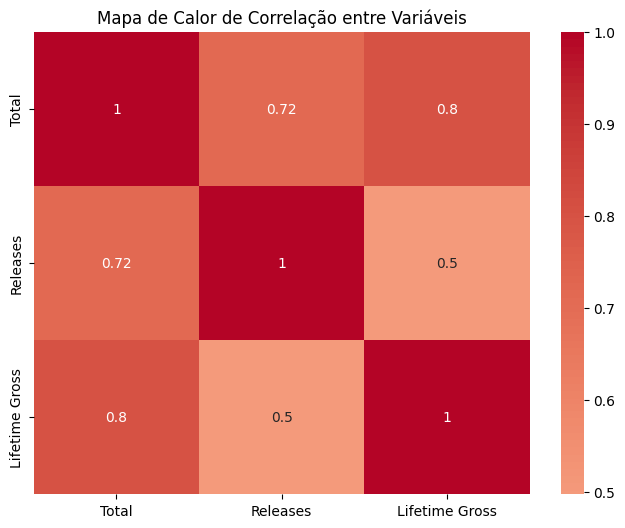

In [123]:
# Criando o mapa de calor de correlação para visualizar a relação entre as variáveis numéricas
# O mapa de calor ajuda a identificar relações fortes ou fracas entre as variáveis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, center=0, cmap="coolwarm")
plt.title('Mapa de Calor de Correlação entre Variáveis')
plt.show()